# Example script for how to generate data

### Import packages

In [1]:
from simulator import VariationalAutoencoder, save_dict_pickle, load_dict_pickle, mark_data_missing_by_target
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


### Load data scaler and Varational Autoencoder

In [2]:
data_scaler_path = '20200120_data_scaler.pickle'
model_path = '20200120_simulation_model_weights.h5'
out_data_path = '20200120_simulated_data.pickle'

In [3]:
loaded_dict = load_dict_pickle(data_scaler_path)
loaded_dict.keys()

dict_keys(['data_scaler', 'col_names', 'y_col_name', 'p0_um', 'p1_um'])

### Load Michigan Medicine missing rate

* p0_um is the missing rate for class 0
* p1_um is the missing rate for class 1

In [4]:
p0_um = loaded_dict['p0_um']
p1_um = loaded_dict['p1_um']

In [5]:
data_scaler = loaded_dict['data_scaler']

In [6]:
data_scaler

In [7]:
vae = VariationalAutoencoder()

In [8]:
vae.X_colnames = loaded_dict['col_names']
vae.Y_colname = loaded_dict['y_col_name']

In [9]:
vae.load(model_path)

### Simulate data

* Create new train, validation and testing data

In [10]:
X_train_complete, Y_train_complete = vae.simulate(50000,as_df=True)
X_val_complete, Y_val_complete = vae.simulate(10000,as_df=True)
X_test_complete, Y_test_complete = vae.simulate(50000,as_df=True)

### Recale (Autoencoder was fit on scaled data)

* Unscale to have the same mean and variance as PICTURE's training cohort

In [11]:
X_train_complete = data_scaler.inverse_transform(X_train_complete)
X_val_complete = data_scaler.inverse_transform(X_val_complete)
X_test_complete = data_scaler.inverse_transform(X_test_complete)

### Add missingness

In [12]:
X_train_um, Y_train_um = mark_data_missing_by_target(X_train_complete, Y_train_complete, p0_um, p1_um)
X_val_um, Y_val_um = mark_data_missing_by_target(X_val_complete, Y_val_complete, p0_um, p1_um)
X_test_um, Y_test_um = mark_data_missing_by_target(X_test_complete, Y_test_complete, p0_um, p1_um)

### Explore

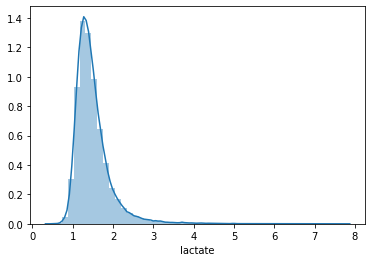

In [13]:
sns.distplot(X_train_complete.lactate)

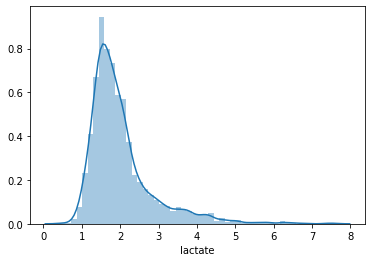

In [14]:
sns.distplot(X_train_complete[Y_train_complete == 1].lactate)

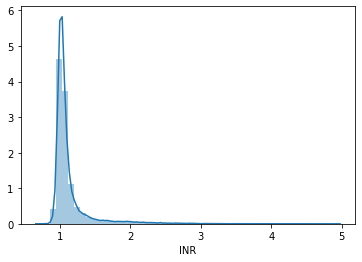

In [15]:
sns.distplot(X_train_complete.INR)

15.0

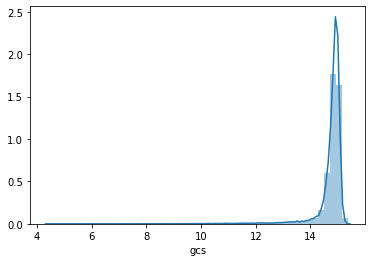

In [16]:
sns.distplot(X_train_complete.gcs)
np.floor(X_train_complete.gcs.max())

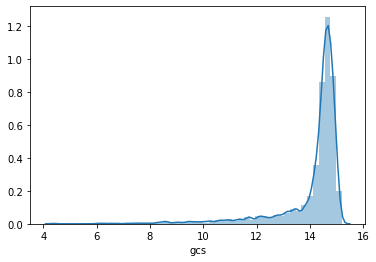

In [17]:
sns.distplot(X_train_complete[Y_train_complete == 1].gcs)

In [18]:
data_scaler.scaler.mean_

array([ 18.10051008,   0.71376345, 122.46190404,  36.77606514,
       299.69442292,  85.33490829,   2.16006235,  92.95734034,
        84.51630104,  57.36361766,  20.32518388,   8.94270299,
       104.50646211,  26.06903935,   1.11722593, 126.98051938,
        35.17272373,  11.69615893,  29.60025487,  33.19487844,
        89.13085961,  10.21857056,   4.20915976,   3.96591459,
        14.73199452, 138.42443976,  14.57915387,   9.41261666,
         1.04050074,   1.9283323 ,   3.59917457,   1.61952331,
         1.22045149,  28.45711857,  12.76622965,   1.70171864,
        84.11261201, 226.56382794,  40.17108148,  12.07071643,
         0.44837184,   4.88401514,   3.67587986,   6.44076228,
        66.78272523])

In [19]:
Y_train_complete.mean()

0.0355

In [20]:
X_train_um[Y_train_um == 1].isna().mean()

resp                         0.000563
shock_indexes                0.001127
systolics                    0.000000
temperature                  0.043380
urine                        0.194366
MAP                          0.000563
o2_24h_max                   0.001690
spo2_24hr_min                0.001127
pulse                        0.000000
AGE_AT_START_OF_ENCOUNTER    0.000000
bun                          0.020845
calcium                      0.020845
chloride                     0.019155
co2                          0.028169
creatinine                   0.015775
glucose                      0.015211
hematocrit                   0.019718
hemoglobin                   0.026479
mean_corps_hgb               0.027606
mean_corps_hgb_conc          0.023662
mean_corps_hgb_vol           0.025915
mean_platelet_vol            0.068169
potassium                    0.017465
red_blood_cell_count         0.031549
red_cell_dist_width          0.022535
sodium                       0.012958
gcs         

In [21]:
p0_um

resp                         0.000926
shock_indexes                0.000795
systolics                    0.000304
temperature                  0.026726
urine                        0.261519
MAP                          0.000304
o2_24h_max                   0.000810
spo2_24hr_min                0.000911
pulse                        0.000231
AGE_AT_START_OF_ENCOUNTER    0.000000
bun                          0.135698
calcium                      0.132054
chloride                     0.130825
co2                          0.133876
creatinine                   0.129899
glucose                      0.094770
hematocrit                   0.118705
hemoglobin                   0.126327
mean_corps_hgb               0.126515
mean_corps_hgb_conc          0.126515
mean_corps_hgb_vol           0.126370
mean_platelet_vol            0.139328
potassium                    0.120209
red_blood_cell_count         0.126370
red_cell_dist_width          0.126819
sodium                       0.120296
gcs         

In [22]:
p1_um

resp                         0.000307
shock_indexes                0.001534
systolics                    0.000613
temperature                  0.037117
urine                        0.193252
MAP                          0.000613
o2_24h_max                   0.003374
spo2_24hr_min                0.000920
pulse                        0.000613
AGE_AT_START_OF_ENCOUNTER    0.000000
bun                          0.022699
calcium                      0.021779
chloride                     0.020859
co2                          0.030061
creatinine                   0.021166
glucose                      0.013497
hematocrit                   0.024540
hemoglobin                   0.029141
mean_corps_hgb               0.029141
mean_corps_hgb_conc          0.029141
mean_corps_hgb_vol           0.028528
mean_platelet_vol            0.066258
potassium                    0.016258
red_blood_cell_count         0.028528
red_cell_dist_width          0.030061
sodium                       0.016258
gcs         

### Save

In [23]:
save_dict_pickle(path=out_data_path,
                X_train_complete=X_train_complete,
                X_val_complete=X_val_complete,
                X_test_complete=X_test_complete,
                Y_train_complete=Y_train_complete,
                Y_val_complete=Y_val_complete,
                Y_test_complete=Y_test_complete,
                X_train_um=X_train_um,
                X_val_um=X_val_um,
                X_test_um=X_test_um,
                Y_train_um=Y_train_um,
                Y_val_um=Y_val_um,
                Y_test_um=Y_test_um
                )